## PCA
In this notebook you will: 
- Replicate Andrew's example on PCA
- Visualize how PCA works on 2-dimensional small dataset and that not every project is "good"
- Use PCA to find hidden patterns in a high-dimensional dataset

## Importing the libraries


In [530]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import plotly.offline as py

In [531]:
py.init_notebook_mode()

In [532]:
output_notebook()

Loading BokehJS ...

## Simple Example
We are going to work on the simple example that which only contains two features.

In [533]:
X = np.array([[ 99,  -1],
       [ 98,  -1],
       [ 97,  -2],
       [101,   1],
       [102,   1],
       [103,   2]])

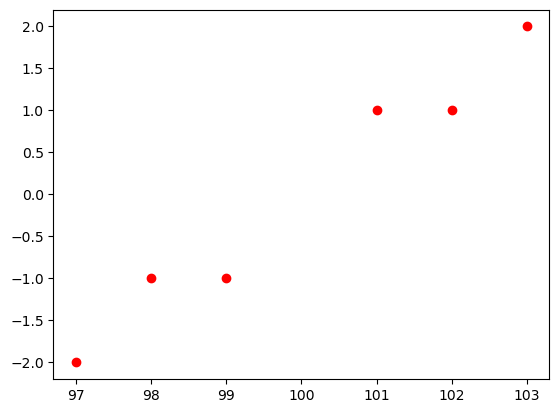

In [534]:
plt.plot(X[:, 0], X[:, 1], 'ro')

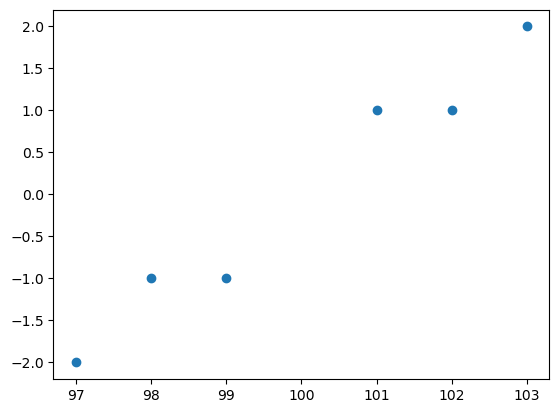

In [535]:
plt.scatter(X[:, 0], X[:, 1])

In [536]:
# Loading the PCA algorithm 
pca_2 = PCA(n_components=2)
pca_2

PCA(n_components=2)

In [537]:
# Let's fit the data. We do not need to scale it, sklearn's implementation already handles it
pca_2.fit(X)

PCA(n_components=2)

In [538]:
pca_2.explained_variance_ratio_

array([0.99244289, 0.00755711])

The coordinates on the first principal component (first axis) are enough to retain 99.24% of the information ("explained variance"). The second principal component adds on 0.75% additional information ("explained variance") that is not stored on the first principal component coordinates.

In [539]:
X_trans_2 = pca_2.transform(X)
X_trans_2

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [540]:
print(pca_2.components_)

[[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]


- The first row represents the contributions of features (two features in this example). The first value, approximately -0.8385, represents the contribution of the first feature to the first pricinpal component.
The second value, approximately -0.5449, represents the contribution of the second feature to the first principal component.

- The second row describes the contributions for the second pricipal component

Think of column 1 as coordinates along the first principal component (the first new axis) and column 2 as coordinates along the second principal component (the second new axis).

You can probably just choose the first pricipal component, since it's already able to retain 99% of the informatino (explained variance)

In [541]:
pca_1 = PCA(n_components=1)
pca_1

PCA(n_components=1)

In [542]:
pca_1.fit(X)
pca_1.explained_variance_ratio_

array([0.99244289])

In [543]:
X_trans_1 = pca_1.transform(X)
print(X_trans_1.shape)
X_trans_1

(6, 1)


array([[ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ],
       [-1.38340578],
       [-2.22189802],
       [-3.6053038 ]])

In [544]:
print("pca_1.components_", pca_1.components_)
first_principal_component = pca_1.components_[0]

pca_1.components_ [[-0.83849224 -0.54491354]]


- The first value, approximately -0.8385, represents the contribution of the first feature to the first principal component.
- The second value, approximately -0.5449, represents the contribution of the second feature to the first principal component.


In [545]:
first_principal_component[0], first_principal_component[1]

(-0.8384922379048738, -0.5449135408239331)

In [546]:
print(X_trans_1)

[[ 1.38340578]
 [ 2.22189802]
 [ 3.6053038 ]
 [-1.38340578]
 [-2.22189802]
 [-3.6053038 ]]


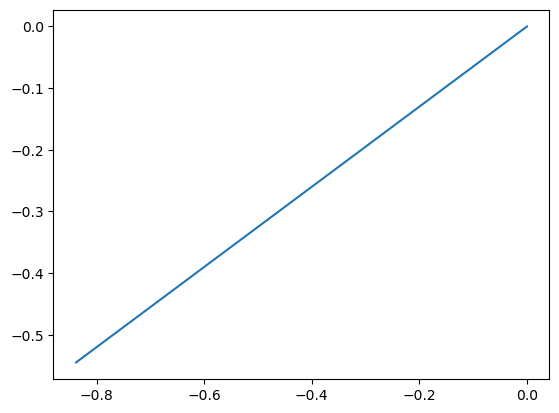

In [547]:
# Plot first principal component
plt.plot([0, first_principal_component[0]], [0, first_principal_component[1]])

Notice how this column is just the first column of `X_trans_2`

If you have 2 features and choose 2 principal components, then you'll keep all the information and the data will end up the same as the original.

In [548]:
X_reduced_2 = pca_2.inverse_transform(X_trans_2)
X_reduced_2

array([[ 99.,  -1.],
       [ 98.,  -1.],
       [ 97.,  -2.],
       [101.,   1.],
       [102.,   1.],
       [103.,   2.]])

Reduce to 1 dimension instead of 2


In [549]:
X_reduced_1 = pca_1.inverse_transform(X_trans_1)
X_reduced_1

array([[ 98.84002499,  -0.75383654],
       [ 98.13695576,  -1.21074232],
       [ 96.97698075,  -1.96457886],
       [101.15997501,   0.75383654],
       [101.86304424,   1.21074232],
       [103.02301925,   1.96457886]])

In [550]:
pca_1.components_

array([[-0.83849224, -0.54491354]])

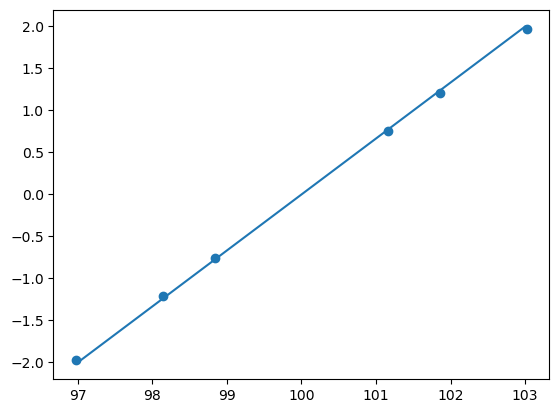

In [551]:
plt.scatter(X_reduced_1[:, 0], X_reduced_1[:, 1])
for_plot_x = np.linspace(min(X[:, 0]), max(X[:, 0]), num=10)
for_plot_y = np.linspace(min(X[:, 1]), max(X[:, 1]), num=10)
plt.plot(for_plot_x, for_plot_y)

Notice how the data are now just on a single line (this line is the first principal component that was used to descibe the data and each example has a single "coordinate" along that axis to descibe its location )

## Visualization of a 3-dimensional dataset
In this section we will see how some 3-dimensional data can be condense into a 2 dimensional space

In [552]:
np.random.seed(42)
print(np.random.rand(10))


[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]


In [553]:
def random_point_circle(center=(0, 0), radius=1, n=1): 
    np.random.seed(42)
    # Generates r that are equal or shorter than given radius
    R = radius * np.sqrt(np.random.rand(n)) 
    # Generates angles
    Theta = np.random.rand(n) * 2 * np.pi
    x = center[0] + R * np.cos(Theta)
    y = center[1] + R * np.sin(Theta)
    return np.array([x, y]).T

X = random_point_circle(n=150)

In [554]:
print(X.shape)
print(X[:5])

(150, 2)
[[ 0.51312243 -0.33353485]
 [ 0.06390213  0.97294955]
 [ 0.52482914  0.67568359]
 [-0.77203185  0.05123778]
 [ 0.3933876  -0.03556458]]


In [555]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Using plotly to plot the data

def plot_3d_2d_graphs(X: np.ndarray): 
    df = pd.DataFrame(X, columns=['x1', 'x2'])
    df['x3'] = df['x1'] + df['x2']
    
    fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scatter3d"}, {"type": "scatter"}]])
    
    fig.add_trace(
        go.Scatter3d(x=df['x1'], y=df['x2'], z=df['x3'], mode='markers'),
        row=1,
        col=1
    ).update_traces(
        marker=dict(color = "#C00000", symbol = "x", size = 2),
    ).update_layout(
        scene=dict(
            xaxis= dict(range=[-1.5, 1.5], showgrid=False),
            xaxis_title = 'x1', 
            yaxis= dict(range=[-1.5, 1.5], showgrid=False),
            yaxis_title = 'x2', 
            zaxis= dict(range=[-1.5, 1.5], showgrid=False),
            zaxis_title = 'x3', 
        ), 
    )
    fig.add_trace(
        go.Scatter(
            x = df.rename(columns={"x1": "z1"})['z1'], 
            y = df.rename(columns= {'x2': 'z2'})['z2'],
            mode='markers', 
            showlegend=False
        ), 
        row=1,
        col=2
    )
    
    
    return fig

plot_3d_2d_graphs(X)

## Using PCA in Exploratory Data Analysis

Let's load a toy dataset with 500 samples and 1000 features

In [556]:
df = pd.read_csv('./toy_dataset.csv')

In [557]:
df.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  27.422157 -29.662712 -23.297163 -15.161935   0.345581   3.706750   
1   3.489482 -19.153551 -14.636424  14.688258  20.114204  13.532852   
2   4.293509  22.691579  -1.045155  -8.740350  12.401082  31.362987   
3  -2.139348  23.158754 -26.241206  19.426465   9.472049   8.453948   
4 -35.251034  27.281816 -29.470282 -21.786865  11.806822  58.655133   

   feature_6  feature_7  feature_8  feature_9  ...  feature_990  feature_991  \
0  -5.507209 -46.992476   5.175469 -47.768145  ...     7.815960    24.320965   
1  34.298084  22.982509  37.938670 -35.648144  ...    11.145527   -38.886603   
2 -18.831206 -35.384557   8.161430 -16.421762  ...    48.190331    -0.503157   
3   0.637211 -26.675984 -43.823329  11.840874  ...   -51.613076    13.278858   
4   5.375230  59.740676 -49.007717 -21.801155  ...     0.010857    20.975655   

   feature_992  feature_993  feature_994  feature_995  feature_996  \
0   -33.987522    22.306088    31.173511    31.264830     8.380699   
1    44.579337    37.308519    29.560535   -10.643331    -6.499263   
2   -21.740678    15.972237     1.122335   -45.473538    10.518065   
3   -44.179281    32.912282     4.805774     3.960836   -15.888356   
4   -21.358371    18.709369    22.362477    41.214565    -7.217724   

   feature_997  feature_998  feature_999  
0   -25.843189    36.706408   -43.480792  
1    19.921666    -3.528982    31.068739  
2    -5.818320   -29.466301   -13.676685  
3    61.384773    33.112334     5.088320  
4    31.173870    37.097532   -27.509420  

[5 rows x 1000 columns]

This is a dataset with 1000 features.

Let's try to see if there is a pattern in the data. The following function will randomly sample 100 pairwise tuples (x, y) of features, so we can scatter-plot them.

In [558]:
def get_pairs(n=100): 
    from random import randint, seed
    seed(42)
    i = 0
    tuples = []
    while i < 100: 
        x = df.columns[randint(0, 999)]
        y = df.columns[randint(0, 999)]
        while x == y or (x, y) in tuples or (y, x) in tuples: 
            y = df.columns[randint(0, 999)]
        tuples.append((x, y))
        i+=1
    return tuples

In [559]:
pairs = get_pairs(100)
print(pairs[:5])

[('feature_654', 'feature_114'), ('feature_25', 'feature_759'), ('feature_281', 'feature_250'), ('feature_228', 'feature_142'), ('feature_754', 'feature_104')]


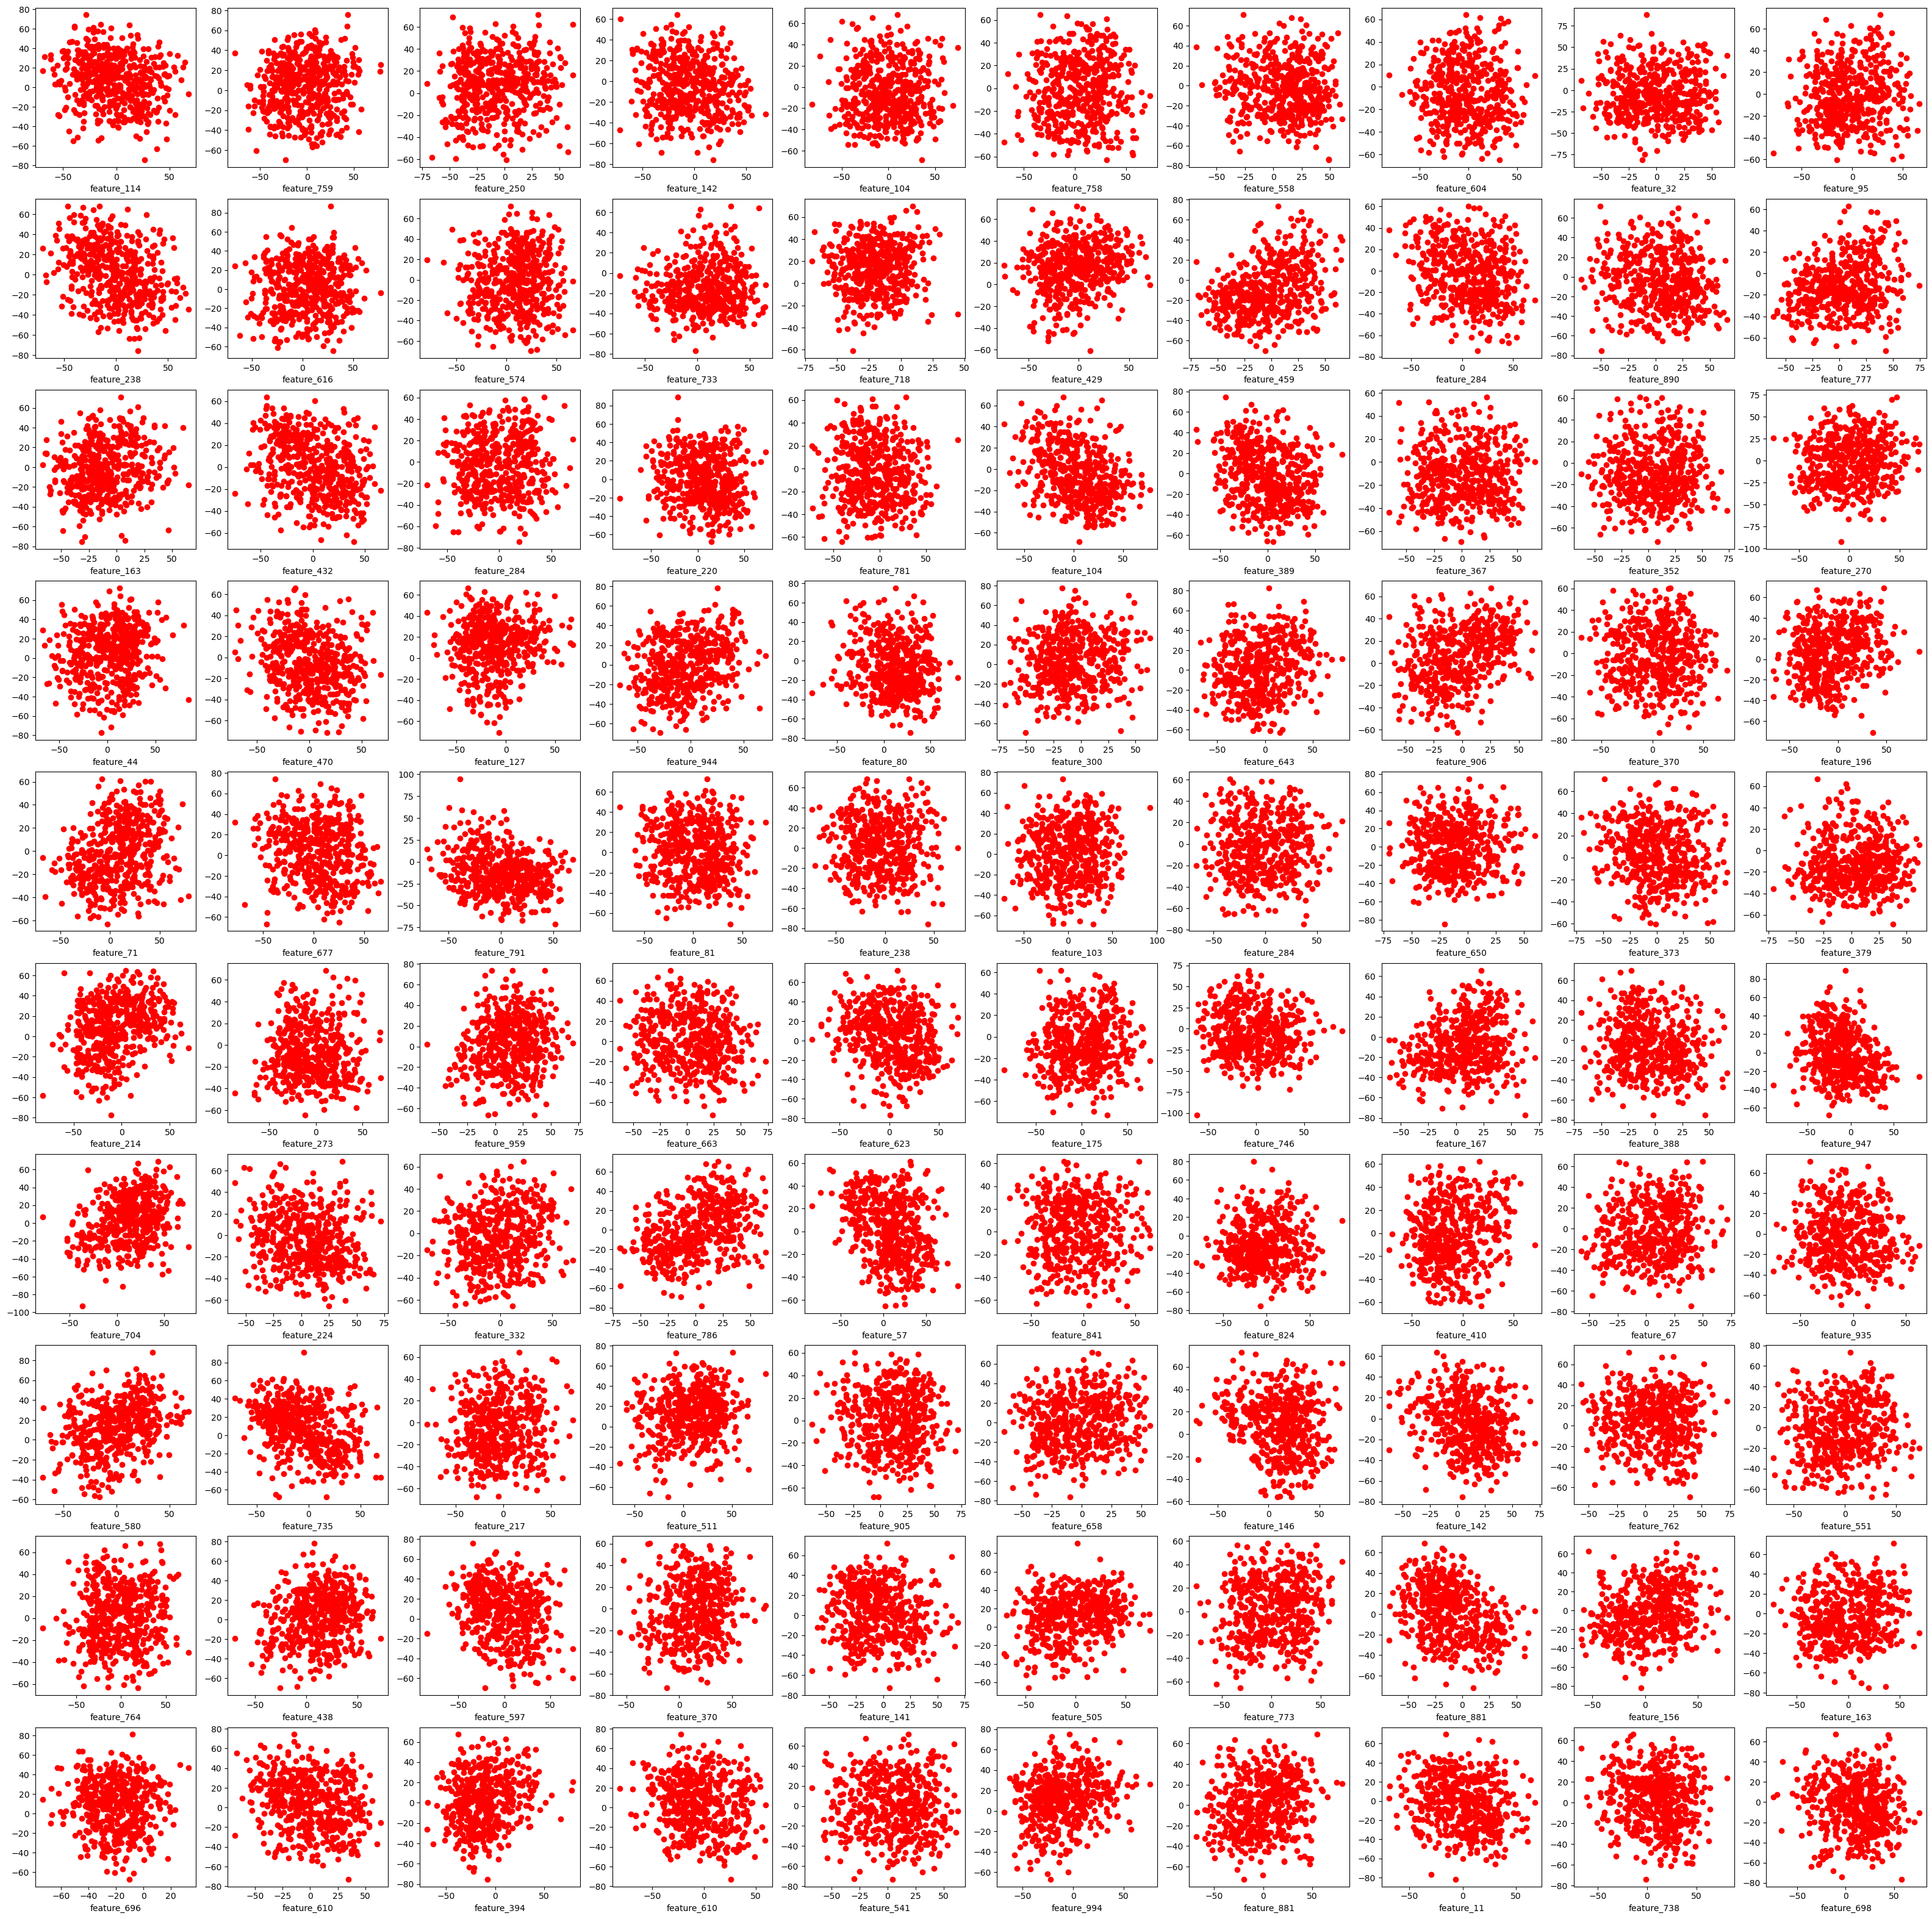

In [560]:
fig, axes = plt.subplots(10, 10, figsize=(40, 40))
i = 0
for rows in axes: 
    for ax in rows: 
        ax.scatter(df[pairs[i][0]], df[pairs[i][1]], color='red')
        ax.set_xlabel(pairs[i][0])
        ax.set_xlabel(pairs[i][1])
        i+=1
        

It looks like there is not much information hidden in pairwise. Also, it's not possible to check every combination, due to the amount of features. Let's try to see the linear correlation between them.

More about correlatin: `https://www.simplilearn.com/covariance-vs-correlation-article`

Covariance and Correlation are kinda similar to each other. However, when it comes to making a choice between covariance vs correlation to measure relationship between variables, correlation is preffered over covariance because it does not get affected by the change in scale

In [561]:
corr = df.corr()

In [562]:
corr

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
feature_0     1.000000  -0.103722   0.015784  -0.033219  -0.415358  -0.266933   
feature_1    -0.103722   1.000000   0.337736  -0.171135   0.345884   0.185080   
feature_2     0.015784   0.337736   1.000000   0.013961   0.345145   0.299024   
feature_3    -0.033219  -0.171135   0.013961   1.000000   0.142227   0.183382   
feature_4    -0.415358   0.345884   0.345145   0.142227   1.000000   0.383280   
...                ...        ...        ...        ...        ...        ...   
feature_995   0.042612   0.018929   0.006617  -0.050576  -0.031877   0.002757   
feature_996   0.289716  -0.260189  -0.072219   0.199677  -0.233503   0.005054   
feature_997  -0.274962   0.235876   0.012333   0.040579   0.214242  -0.079437   
feature_998   0.027641  -0.210954  -0.229972  -0.014650  -0.199061   0.093945   
feature_999   0.049573   0.047979  -0.076818   0.171000   0.012381   0.052593   

             feature_6  feature_7  feature_8  feature_9  ...  feature_990  \
feature_0    -0.137141  -0.194403   0.162446  -0.083976  ...    -0.120494   
feature_1     0.208196  -0.044625  -0.079949  -0.001948  ...    -0.005403   
feature_2     0.039985  -0.100859  -0.038675  -0.154532  ...     0.209160   
feature_3     0.049378  -0.088616  -0.116847  -0.152066  ...    -0.040119   
feature_4     0.277062   0.180477  -0.096038  -0.016284  ...     0.220092   
...                ...        ...        ...        ...  ...          ...   
feature_995   0.131874  -0.085383  -0.005111   0.348188  ...     0.024636   
feature_996  -0.197800  -0.068711  -0.263666  -0.201586  ...    -0.265101   
feature_997   0.143915  -0.141962   0.029627   0.210807  ...     0.013300   
feature_998  -0.087634  -0.147473  -0.048616   0.280748  ...    -0.065135   
feature_999   0.192966   0.072101   0.252028  -0.161262  ...     0.041341   

             feature_991  feature_992  feature_993  feature_994  feature_995  \
feature_0       0.020968     0.078680    -0.033252     0.076851     0.042612   
feature_1       0.123397    -0.250359    -0.090698     0.044208     0.018929   
feature_2       0.232511    -0.061087    -0.135484    -0.111952     0.006617   
feature_3      -0.256840    -0.015278    -0.185727    -0.144647    -0.050576   
feature_4       0.101415    -0.006388    -0.115772    -0.004572    -0.031877   
...                  ...          ...          ...          ...          ...   
feature_995     0.300726    -0.111659    -0.174067     0.176845     1.000000   
feature_996     0.042686    -0.042798    -0.141298    -0.022569     0.007601   
feature_997    -0.059288    -0.125165    -0.183001     0.040979     0.108621   
feature_998     0.040369    -0.200637     0.140856    -0.071527     0.332544   
feature_999    -0.510034     0.071651     0.084861    -0.092606    -0.374151   

             feature_996  feature_997  feature_998  feature_999  
feature_0       0.289716    -0.274962     0.027641     0.049573  
feature_1      -0.260189     0.235876    -0.210954     0.047979  
feature_2      -0.072219     0.012333    -0.229972    -0.076818  
feature_3       0.199677     0.040579    -0.014650     0.171000  
feature_4      -0.233503     0.214242    -0.199061     0.012381  
...                  ...          ...          ...          ...  
feature_995     0.007601     0.108621     0.332544    -0.374151  
feature_996     1.000000    -0.297023     0.093343    -0.167742  
feature_997    -0.297023     1.000000    -0.085454    -0.056337  
feature_998     0.093343    -0.085454     1.000000    -0.126505  
feature_999    -0.167742    -0.056337    -0.126505     1.000000  

[1000 rows x 1000 columns]

In [563]:
corr.shape

(1000, 1000)

In [564]:
# This will show all the features that have correlation > 0.5 in absolute value
# We remove the features with correlation == 1 to remove the correlation of a feature with itself
mask = (abs(corr) > 0.5 ) & (abs(corr)!= 1)

data_corr = corr.where(mask)
data_corr

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
feature_0          NaN        NaN        NaN        NaN        NaN        NaN   
feature_1          NaN        NaN        NaN        NaN        NaN        NaN   
feature_2          NaN        NaN        NaN        NaN        NaN        NaN   
feature_3          NaN        NaN        NaN        NaN        NaN        NaN   
feature_4          NaN        NaN        NaN        NaN        NaN        NaN   
...                ...        ...        ...        ...        ...        ...   
feature_995        NaN        NaN        NaN        NaN        NaN        NaN   
feature_996        NaN        NaN        NaN        NaN        NaN        NaN   
feature_997        NaN        NaN        NaN        NaN        NaN        NaN   
feature_998        NaN        NaN        NaN        NaN        NaN        NaN   
feature_999        NaN        NaN        NaN        NaN        NaN        NaN   

             feature_6  feature_7  feature_8  feature_9  ...  feature_990  \
feature_0          NaN        NaN        NaN        NaN  ...          NaN   
feature_1          NaN        NaN        NaN        NaN  ...          NaN   
feature_2          NaN        NaN        NaN        NaN  ...          NaN   
feature_3          NaN        NaN        NaN        NaN  ...          NaN   
feature_4          NaN        NaN        NaN        NaN  ...          NaN   
...                ...        ...        ...        ...  ...          ...   
feature_995        NaN        NaN        NaN        NaN  ...          NaN   
feature_996        NaN        NaN        NaN        NaN  ...          NaN   
feature_997        NaN        NaN        NaN        NaN  ...          NaN   
feature_998        NaN        NaN        NaN        NaN  ...          NaN   
feature_999        NaN        NaN        NaN        NaN  ...          NaN   

             feature_991  feature_992  feature_993  feature_994  feature_995  \
feature_0            NaN          NaN          NaN          NaN          NaN   
feature_1            NaN          NaN          NaN          NaN          NaN   
feature_2            NaN          NaN          NaN          NaN          NaN   
feature_3            NaN          NaN          NaN          NaN          NaN   
feature_4            NaN          NaN          NaN          NaN          NaN   
...                  ...          ...          ...          ...          ...   
feature_995          NaN          NaN          NaN          NaN          NaN   
feature_996          NaN          NaN          NaN          NaN          NaN   
feature_997          NaN          NaN          NaN          NaN          NaN   
feature_998          NaN          NaN          NaN          NaN          NaN   
feature_999    -0.510034          NaN          NaN          NaN          NaN   

             feature_996  feature_997  feature_998  feature_999  
feature_0            NaN          NaN          NaN          NaN  
feature_1            NaN          NaN          NaN          NaN  
feature_2            NaN          NaN          NaN          NaN  
feature_3            NaN          NaN          NaN          NaN  
feature_4            NaN          NaN          NaN          NaN  
...                  ...          ...          ...          ...  
feature_995          NaN          NaN          NaN          NaN  
feature_996          NaN          NaN          NaN          NaN  
feature_997          NaN          NaN          NaN          NaN  
feature_998          NaN          NaN          NaN          NaN  
feature_999          NaN          NaN          NaN          NaN  

[1000 rows x 1000 columns]

The stack function in pandas typically removes NaN (Not a Number) values when it stacks a DataFrame. When you apply stack to a DataFrame, it effectively converts it into a Series with a multi-level index. During this transformation, only the non-null values from the DataFrame are included in the resulting Series, and any NaN values are excluded.

In [565]:
data_corr.stack().sort_values()

feature_81   feature_657   -0.631294
feature_657  feature_81    -0.631294
feature_313  feature_4     -0.615317
feature_4    feature_313   -0.615317
feature_716  feature_1     -0.609056
                              ...   
feature_792  feature_547    0.620864
feature_35   feature_965    0.631424
feature_965  feature_35     0.631424
feature_395  feature_985    0.632593
feature_985  feature_395    0.632593
Length: 1870, dtype: float64

The maximum and minimum correlation is around `0.631294 - 0.632`. This does not show much as well.

Let's try PCA decomposition to compress our data into a 2-dimensional subspace (plane) so we can plot it as scatter plot.

In [566]:
# Loading the PCA object
# Here we choose the number of principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

df_pca = pd.DataFrame(X_pca, columns=['principal_component_1', 'principal_component_2'])
print(df_pca.shape)

(500, 2)


In [567]:
df_pca.head()

principal_component_1  principal_component_2
0             -46.235641              -1.672797
1            -210.208758             -84.068249
2             -26.352795            -127.895751
3            -116.106804            -269.368256
4            -110.183605            -279.657306

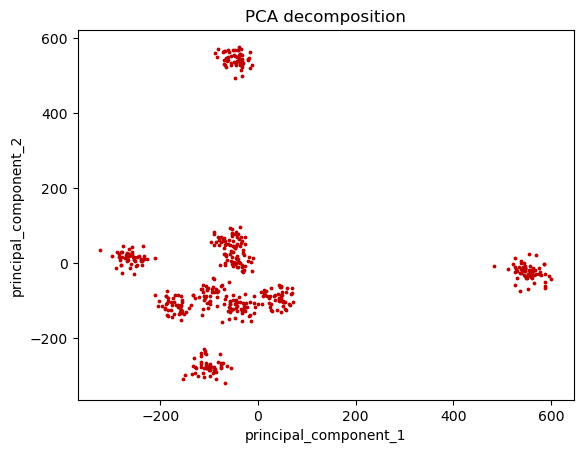

In [568]:
plt.scatter(df_pca['principal_component_1'],df_pca['principal_component_2'], color = "#C00000", s=3)
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA decomposition');

In [569]:
fig = make_subplots(
    rows=1, cols=1, specs=[[{"type": 'scatter'}]], 
    x_title='principal_component_1',
    y_title='principal_component_2', 
)
fig.add_trace(
    go.Scatter(
    x = df_pca['principal_component_1'], 
    y=df_pca['principal_component_2'],
    mode='markers',
    ),
).update_traces(
    marker=dict(color = "#C00000", symbol = "x", size = 4)
).update_layout(width=640, height=600)

This is great! We can see well defined clusters.

pca.explained_variance_ratio_ returns a list where it shows amount of variance explained by each principal component.

In [572]:

print('Variance explained by each principal component: ', pca.explained_variance_ratio_)
print("Total variance explained by every component", sum(pca.explained_variance_ratio_))

Variance explained by each principal component:  [0.07898605 0.06674239]
Total variance explained by every component 0.14572843555106263


And we preserved only around 14.6% of the variance!
We can clearly see clusters in our data, something we could not see before.

If we run a PCA to plot 3-dimensions, we will get more information from data

In [574]:
pca_3 = PCA(n_components = 3).fit(df)
X_t = pca_3.transform(df)
df_pca_3 = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3'])
print(df_pca_3.shape)

(500, 3)


In [585]:
import plotly.express as px
fig = px.scatter_3d(df_pca_3,x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3').update_traces(marker = dict(color = "#C00000", size= 1, symbol = 'x'))
fig.show()

In [587]:
sum(pca_3.explained_variance_ratio_)

0.20806257816093254

Now we preserved 20.8% of the variance of the variance and we can clearly see 10 clusters